In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner

import os
import sys
from pathlib import Path
path = Path(os.getcwd())
path_parent=str(path.parent.absolute())
path_module=path_parent+'/src/SuPerSim'
sys.path.insert(0, os.path.abspath(path_module))

from SuPerSim.functions_summary import *
from SuPerSim.pickling import get_all_stats

In [2]:
################################################
# Here, write the paths to your own data files #
################################################

# this is just introduced for convenience
path_data           = path_parent+'/examples/data/'

# those are the real variables
path_forcing_merra2 = path_data+'/scaled_merra2_Aksaut.nc'
path_ground         = path_data+'South/result_soil_temperature.nc'
path_snow           = path_data+'South/result_snow_depth.nc'
path_swe            = path_data+'South/result_swe.nc'
path_thaw_depth     = path_data+'South/result_thaw_depth.nc'
path_metadata       = path_data+'South/metadata_South.csv'
path_pickle         = path_parent+'/examples/python_pickles/'

path_horizon        = None

###############################################################
# Enter the parameters of your site and of the rockfall event #
###############################################################

site                = 'Aksaut_South'

# CREATE THE PICKLES
year_bkg_end      = 2010
year_trans_end    = 2023
forcing_list      = ['merra2']
path_forcing_list = [path_forcing_merra2]
consecutive       = 7
date_event        = [2021, 12, 31]
topo_event        = []
glacier           = False
min_glacier_depth = 100

# CREATE THE PLOTS
no_weight               = True

print_plots             = True
split_legend            = True
save_plots_pdf          = True

custom_years            = None
query                   = None

show_hor                = False
show_hist               = True
show_glaciers           = True
show_yearly_box         = True
show_yearly_stats_atmos = True
show_yearly_stats_sims  = True
show_thaw_depth         = True
show_2metrics_seasonal  = True
show_1metric_seasonal   = True
show_decades            = True
show_excep_years        = True
show_normdev            = True
show_landslide_time     = True
show_individual_heatmap = True
show_heatmaps           = True
show_quantiles          = True
show_meltout            = True
show_GST_evol           = True
show_parity             = True

Succesfully opened the pre-existing pickle: df_Aksaut_South.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Aksaut_South.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Aksaut_South.pkl
Succesfully opened the pre-existing pickle: melt_out_Aksaut_South.pkl
Succesfully opened the pre-existing pickle: df_stats_Aksaut_South.pkl
Succesfully opened the pre-existing pickle: rockfall_values_Aksaut_South.pkl

---------------------------------------------------------------------------------------------

The following plot is a histogram of the distribution of the statistical weights of all simulations:


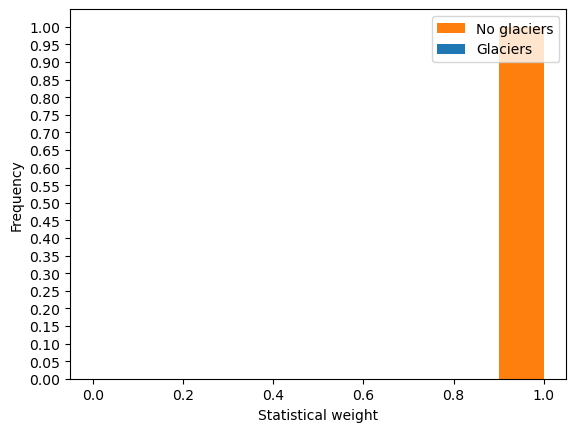


---------------------------------------------------------------------------------------------

The following plot is a histogram of the distribution of glacier simulations wrt to altitude, aspect, slope, and forcing:


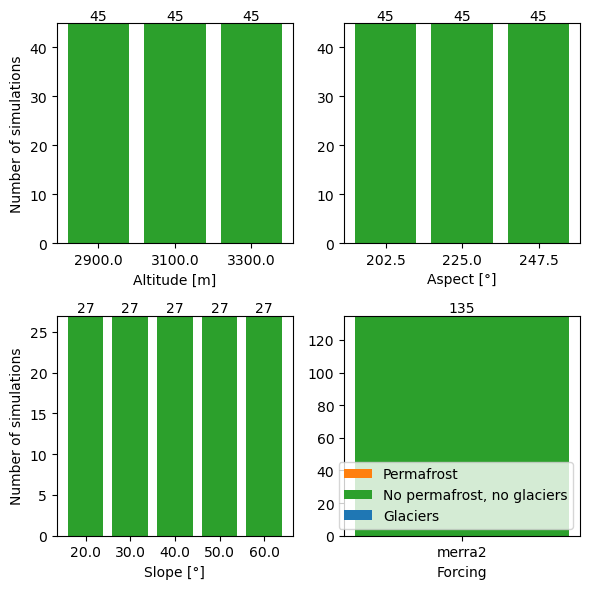


---------------------------------------------------------------------------------------------
------------------------------------- TEMPORAL ANALYSIS -------------------------------------
---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

Yearly statistics for air and ground surface temperature, and also precipitation and water production


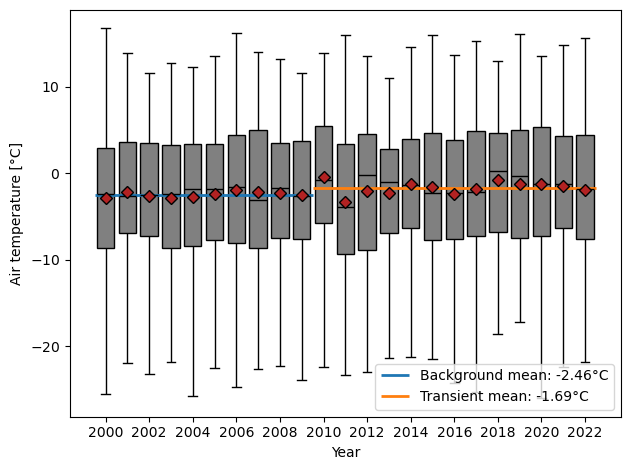

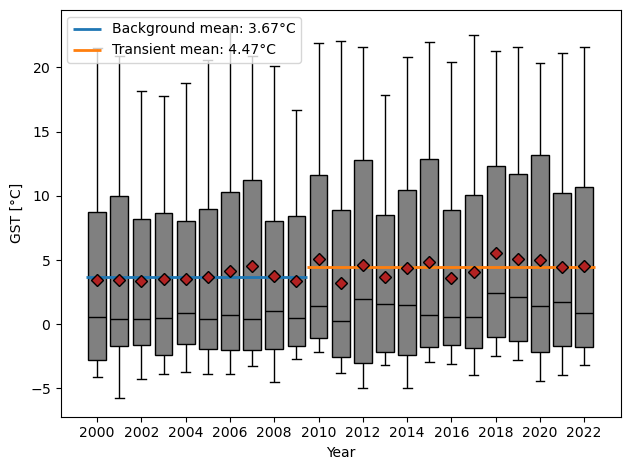

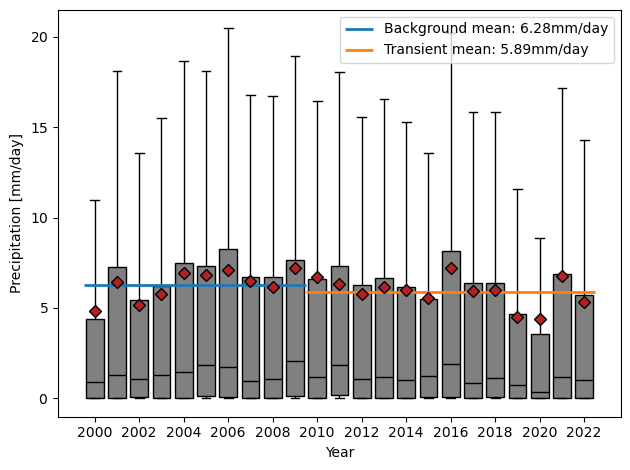

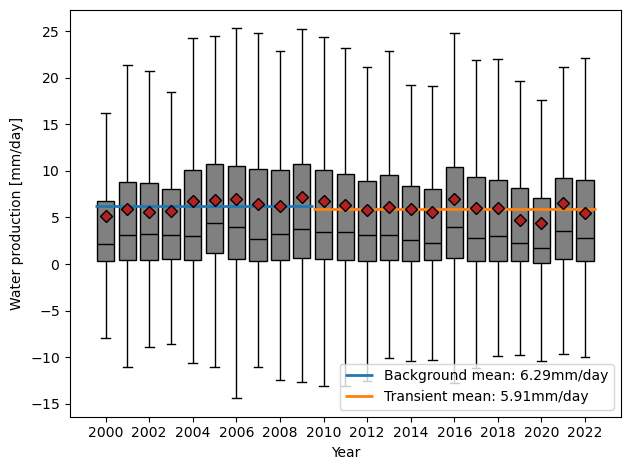


---------------------------------------------------------------------------------------------

Plot of yearly statistics for atmospheric timeseries. Mean and several quantiles for each year:


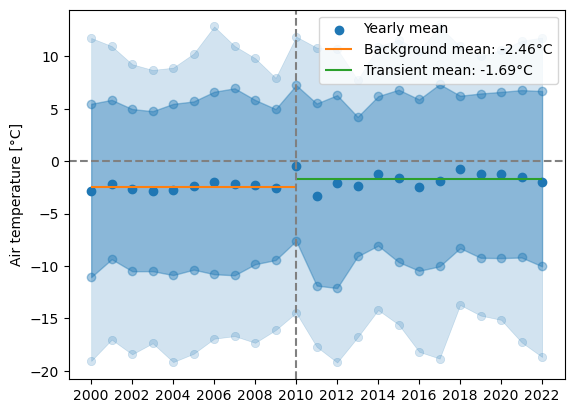

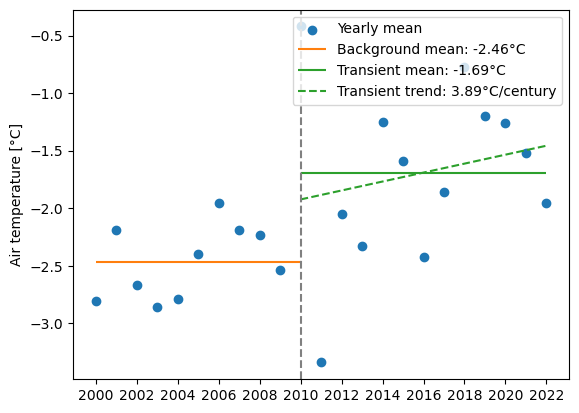

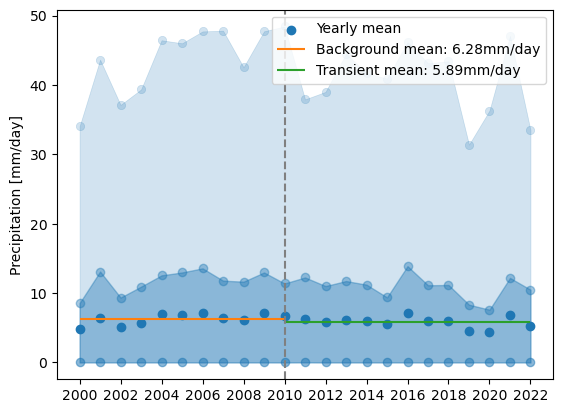

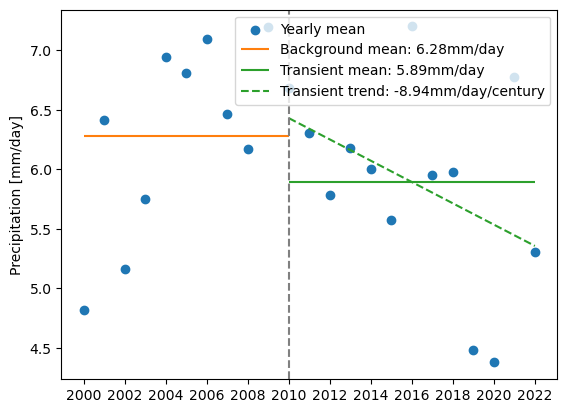


---------------------------------------------------------------------------------------------

Plot of yearly statistics for simulated timeseries. Mean and several quantiles for each year:


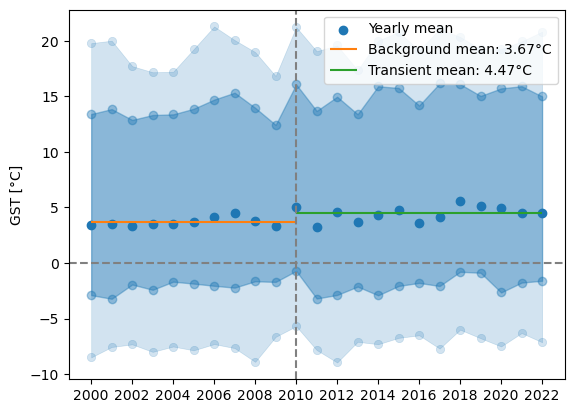

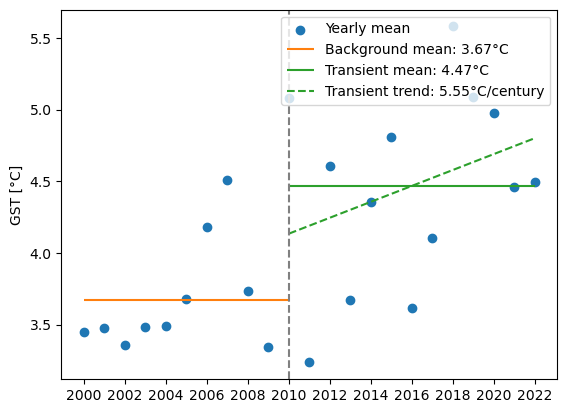

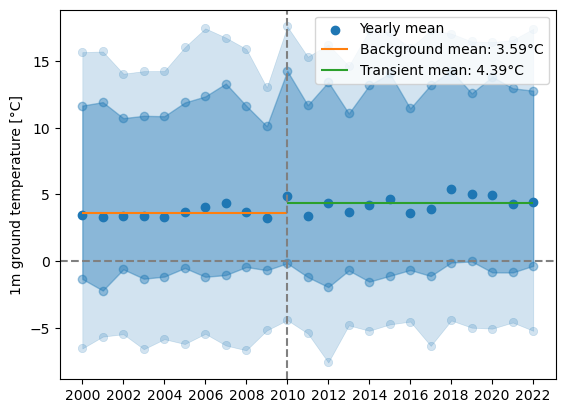

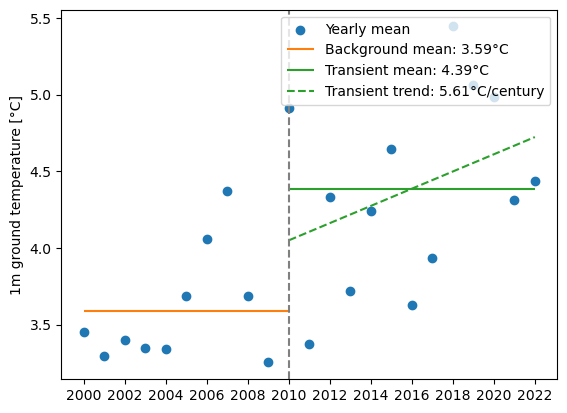

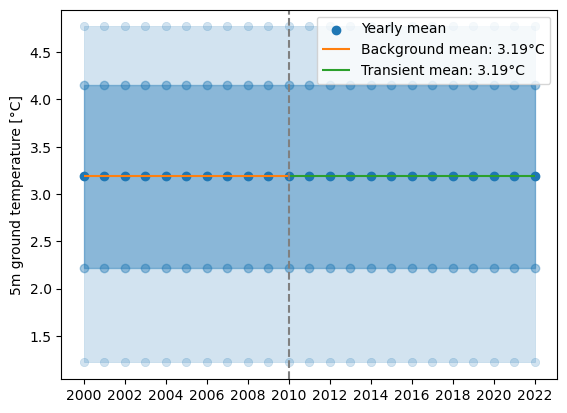

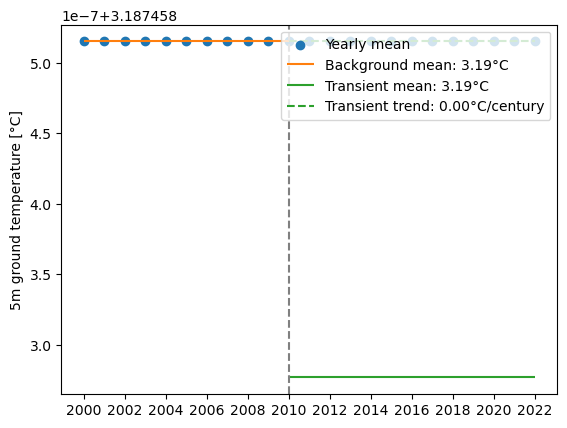

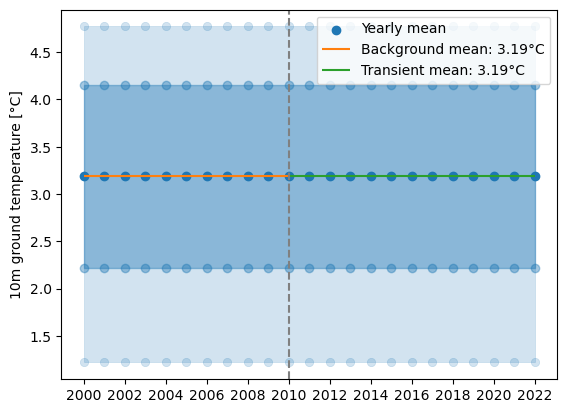

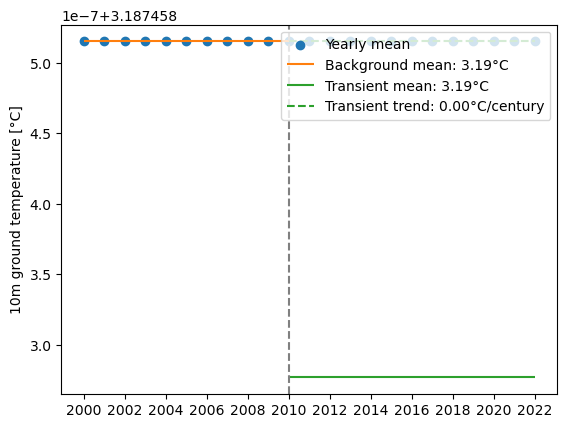

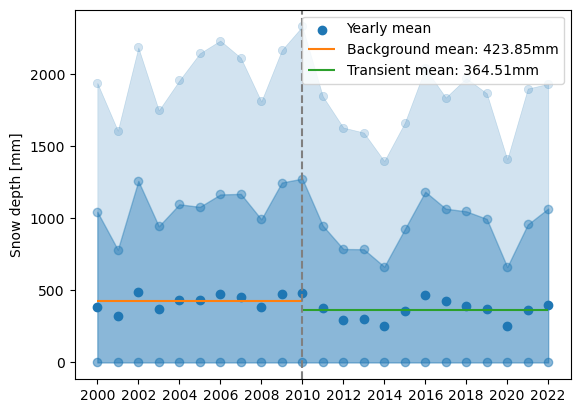

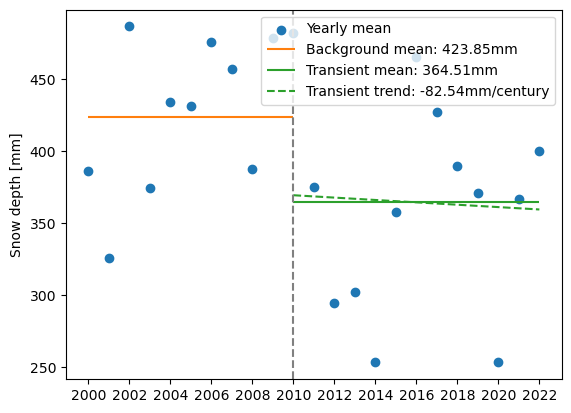

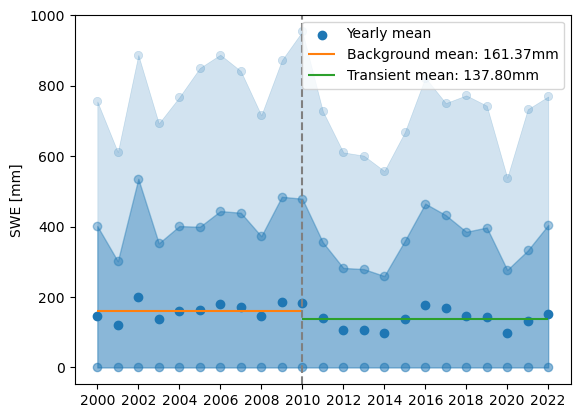

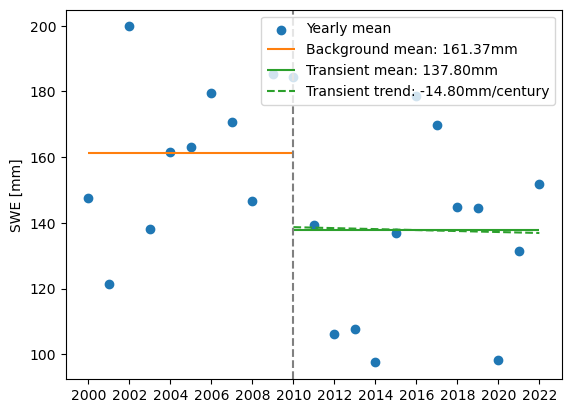

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



---------------------------------------------------------------------------------------------

Plot of the evolution of maximum annual thaw for groups of simulations binned by (altitude,slope) couples:


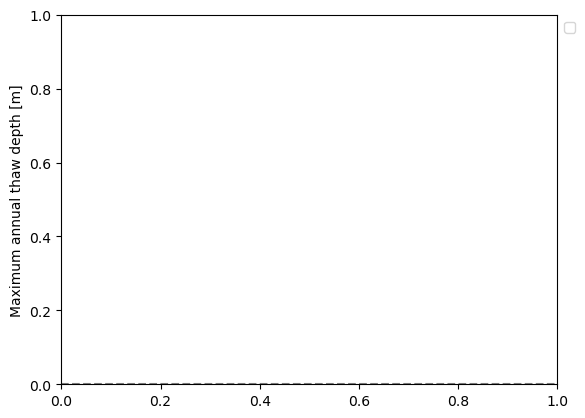


---------------------------------------------------------------------------------------------

Plot of 2 timeseries reduced to a 1-year window with mean and 1- and 2-sigma spread:


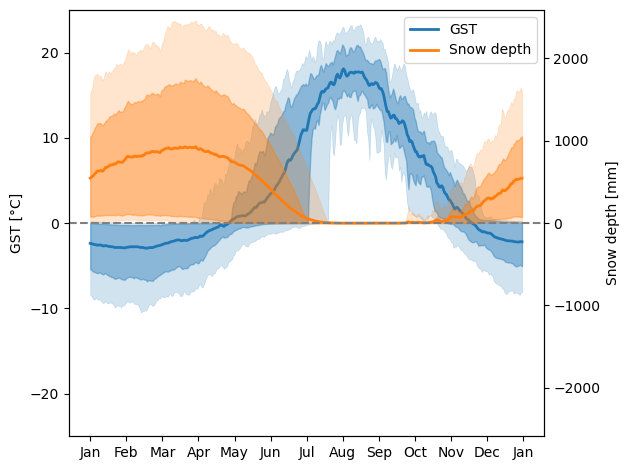


---------------------------------------------------------------------------------------------

Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for background and transient periods:


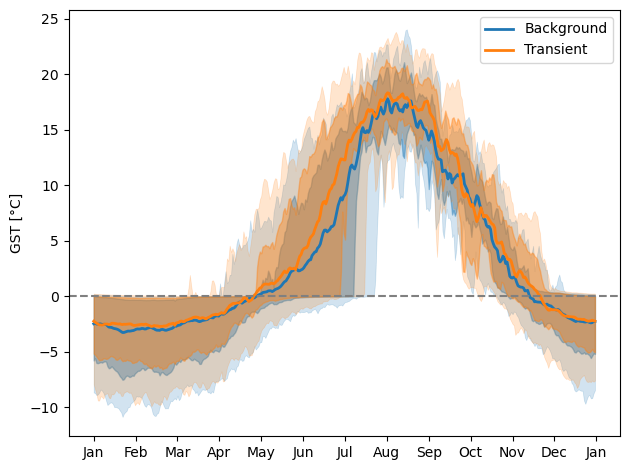

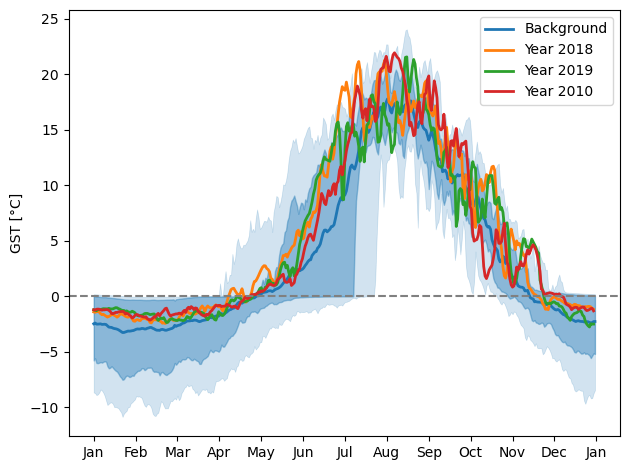

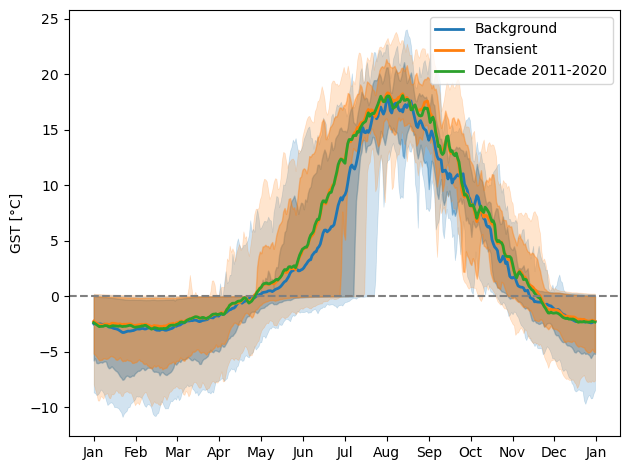

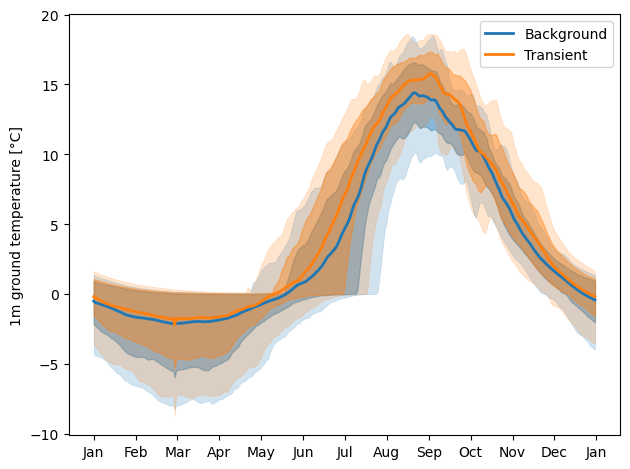

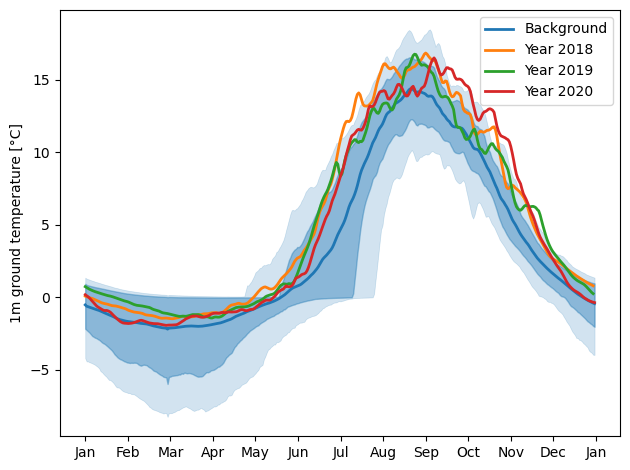

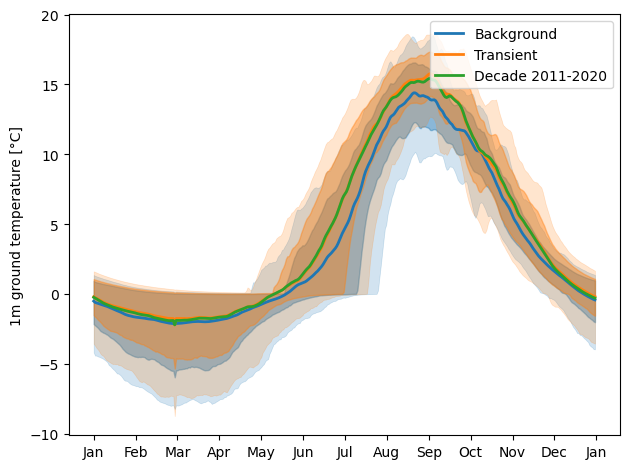

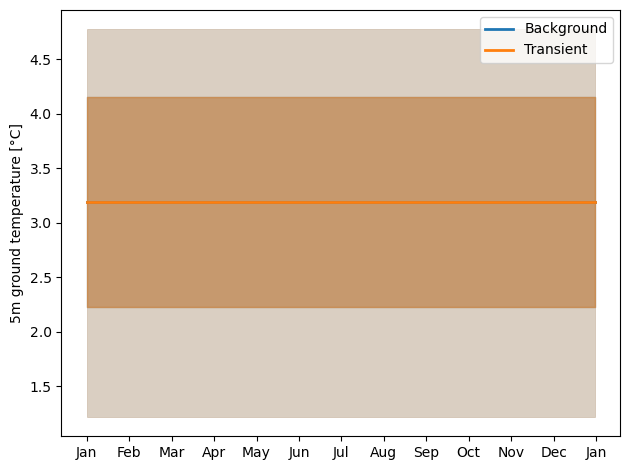

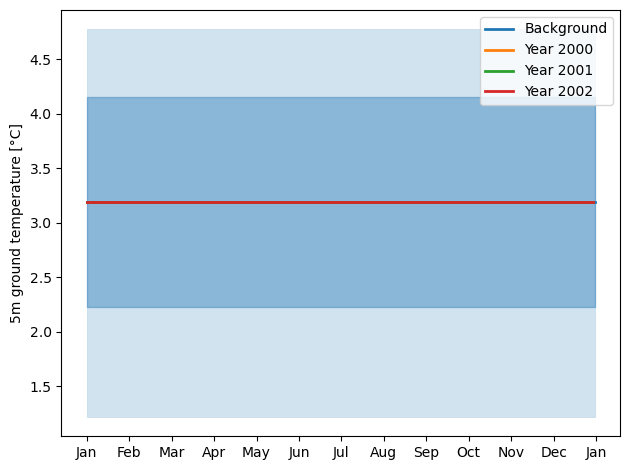

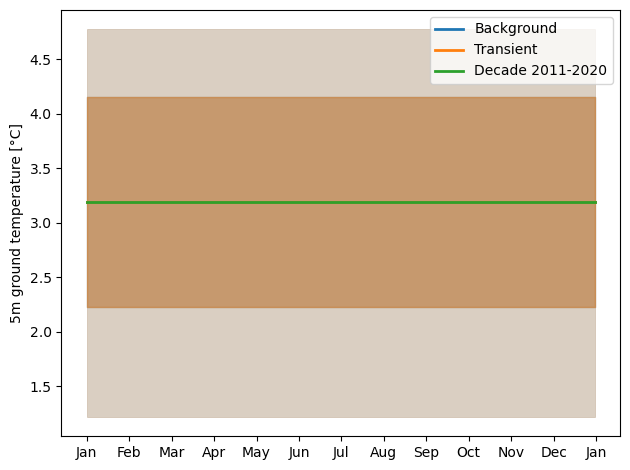

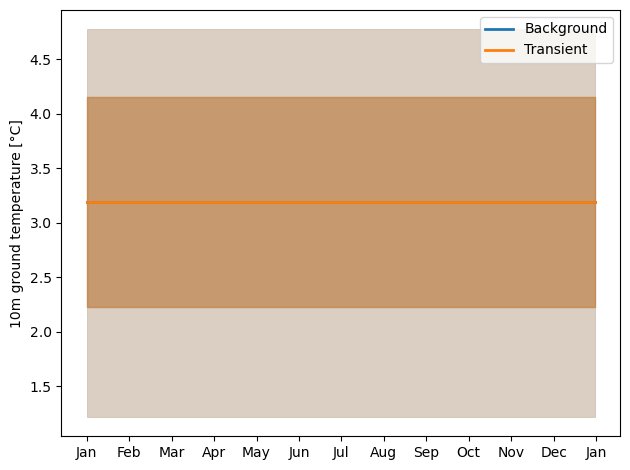

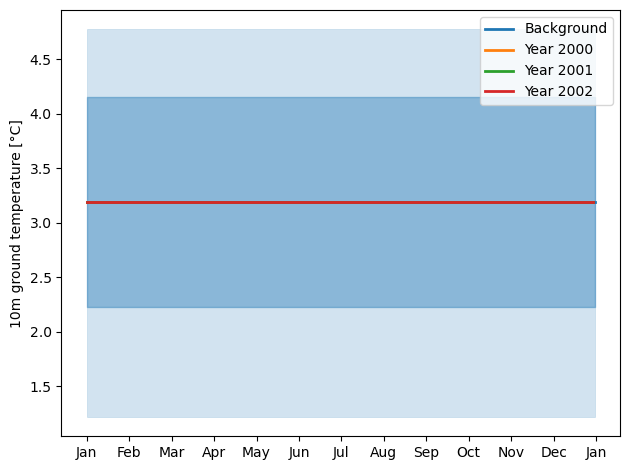

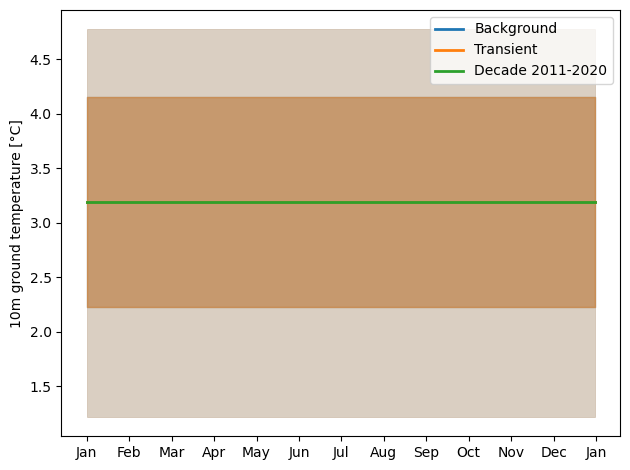

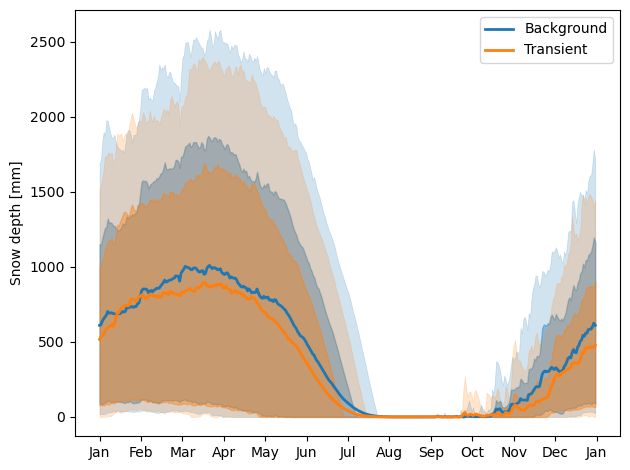

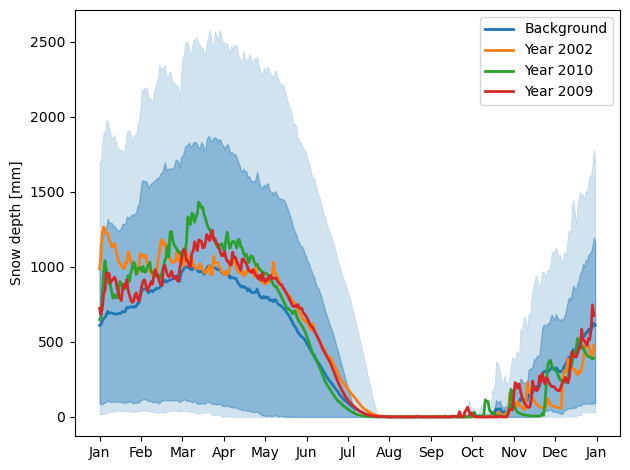

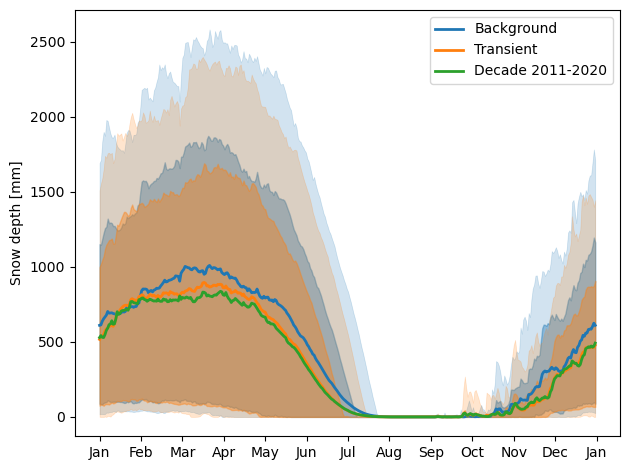

Plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
We could also called the normalized deviation: standardized anomaly for instance, given by (x-\mu)/\sigma)

---------------------------------------------------------------------------------------------

Granularity: week and month side by side


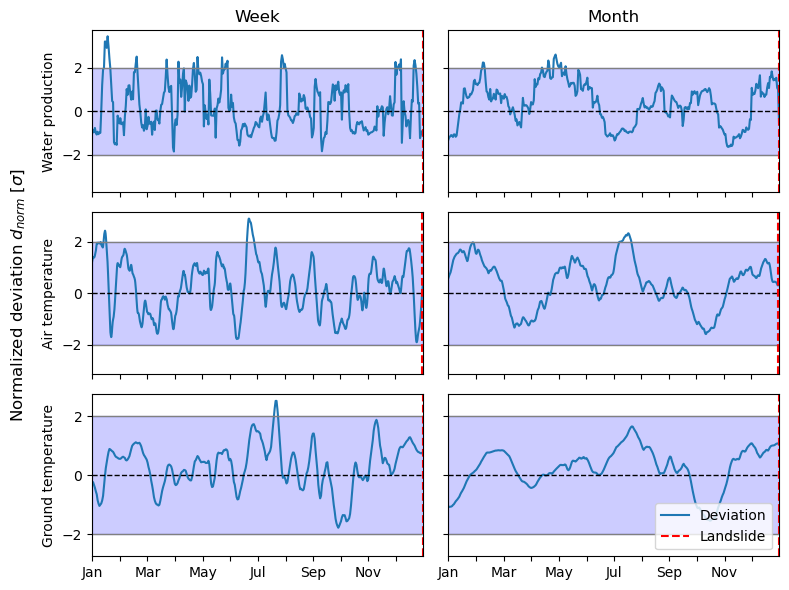


---------------------------------------------------------------------------------------------

Granularity: year, plotted for all years


/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/SuPerSim/runningstats.py:297: RuntimeWarning: invalid value encountered in scalar divide
  distance[year] = {day: (temp_smoothed[list_dates[year][day]]-aggregate_mean[year][day])/aggreagte_std[year][day] for day in range(num_min)}
/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/SuPerSim/runningstats.py:308: RuntimeWarning: invalid value encountered in scalar divide
  distance[year] = {day: (temp_smoothed[list_dates[year][day]]-aggregate_mean[year][day])/aggreagte_std[year][day] for day in range(num_min)}


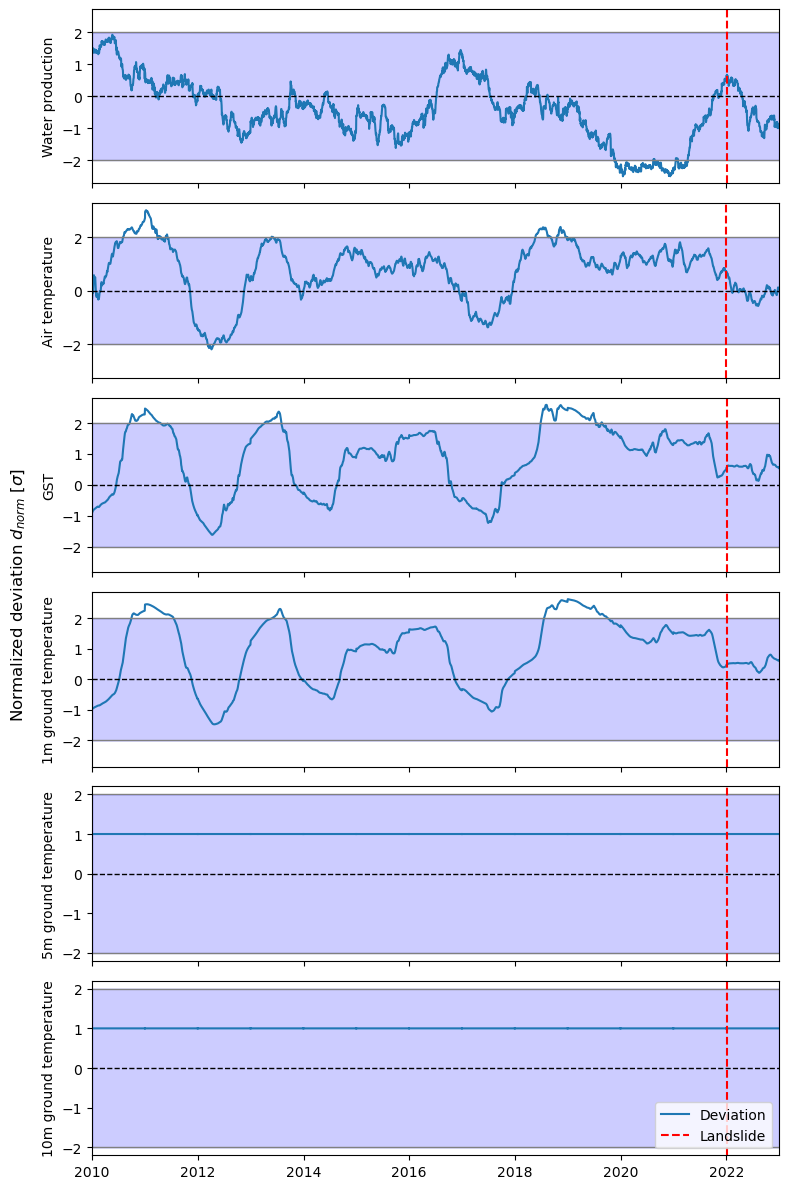


---------------------------------------------------------------------------------------------
------------------------------------- SPATIAL ANALYSIS --------------------------------------
---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

Heatmap of the background mean GST as a function of aspect and slope at 3100.0 m:


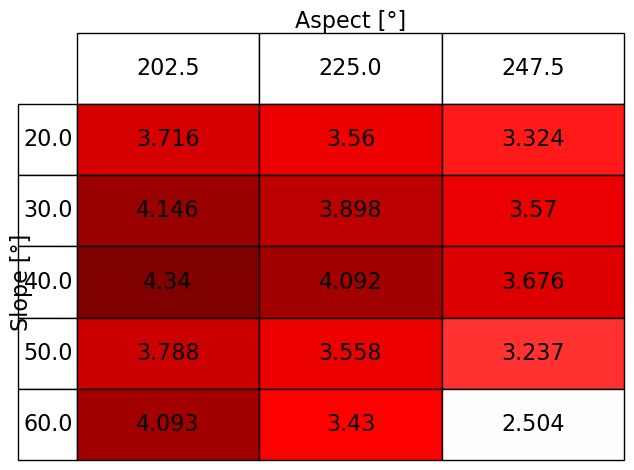


---------------------------------------------------------------------------------------------

Heatmap of the evolution of the mean GST between the background and the transient periods as a function of aspect and slope at 3100.0 m:


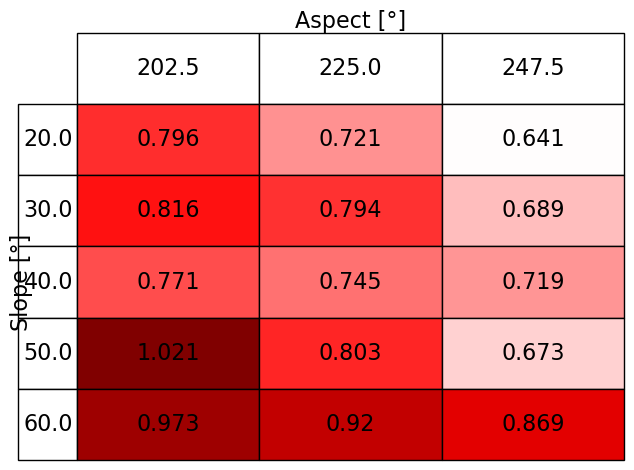


---------------------------------------------------------------------------------------------

Heatmap of the background mean GST and its evolution as a function of aspect and slope at all altitudes


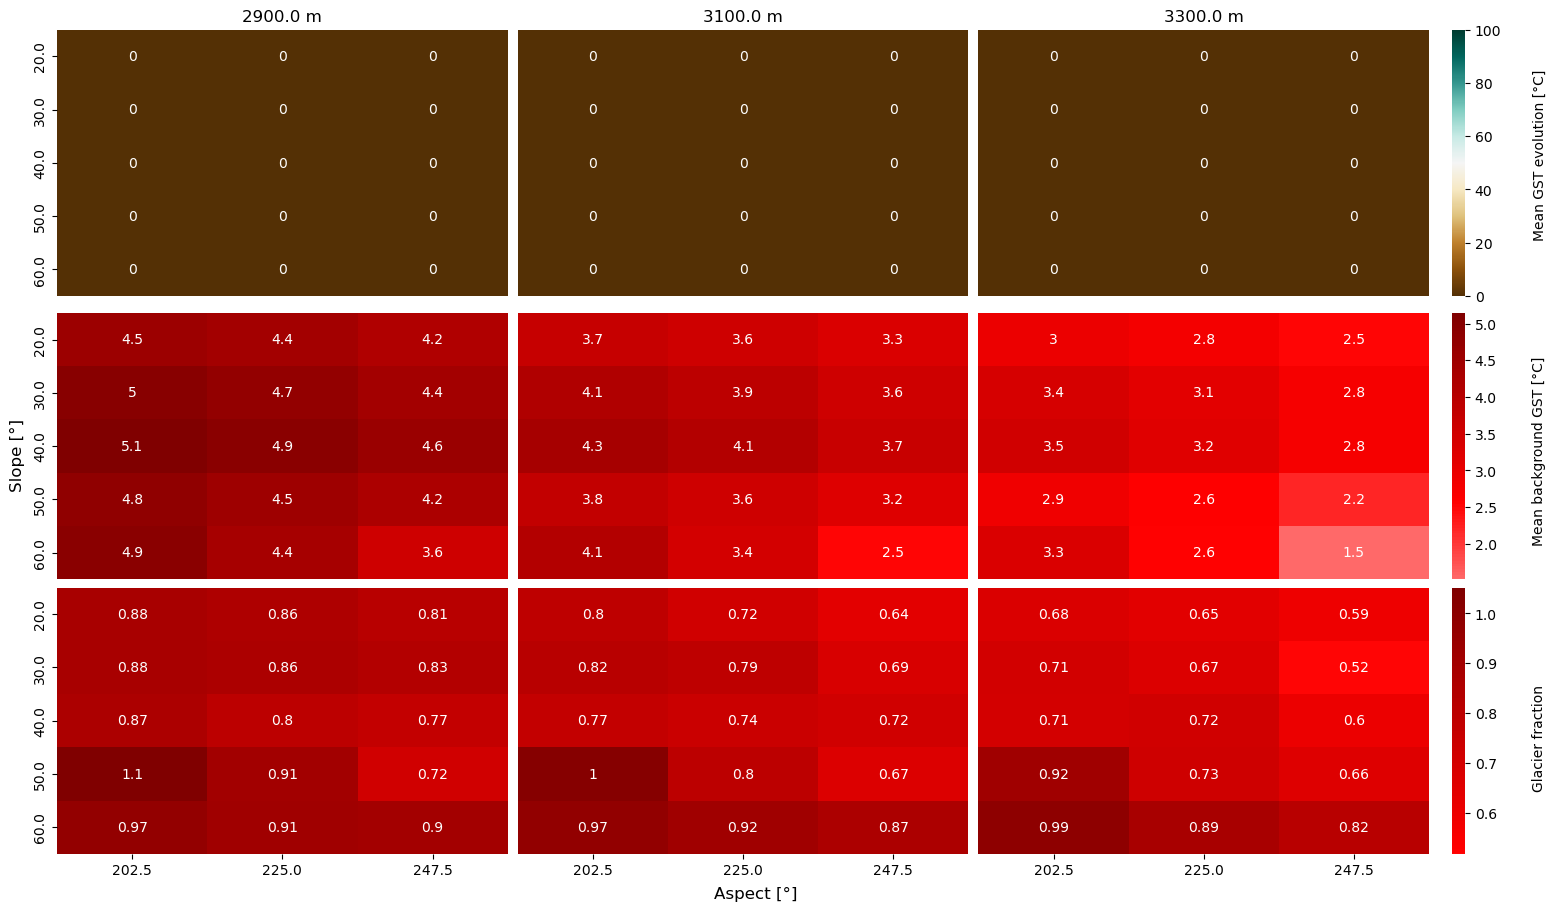


---------------------------------------------------------------------------------------------

Polar heatmap of the background mean GST and its evolution as a function of aspect and slope at all altitude


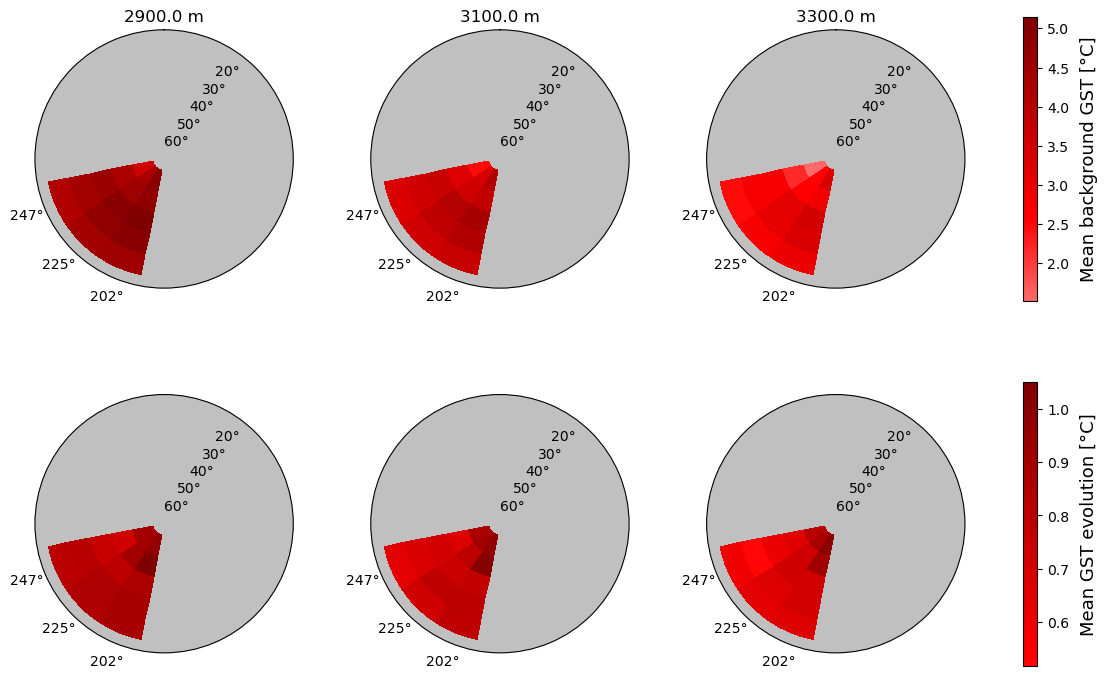

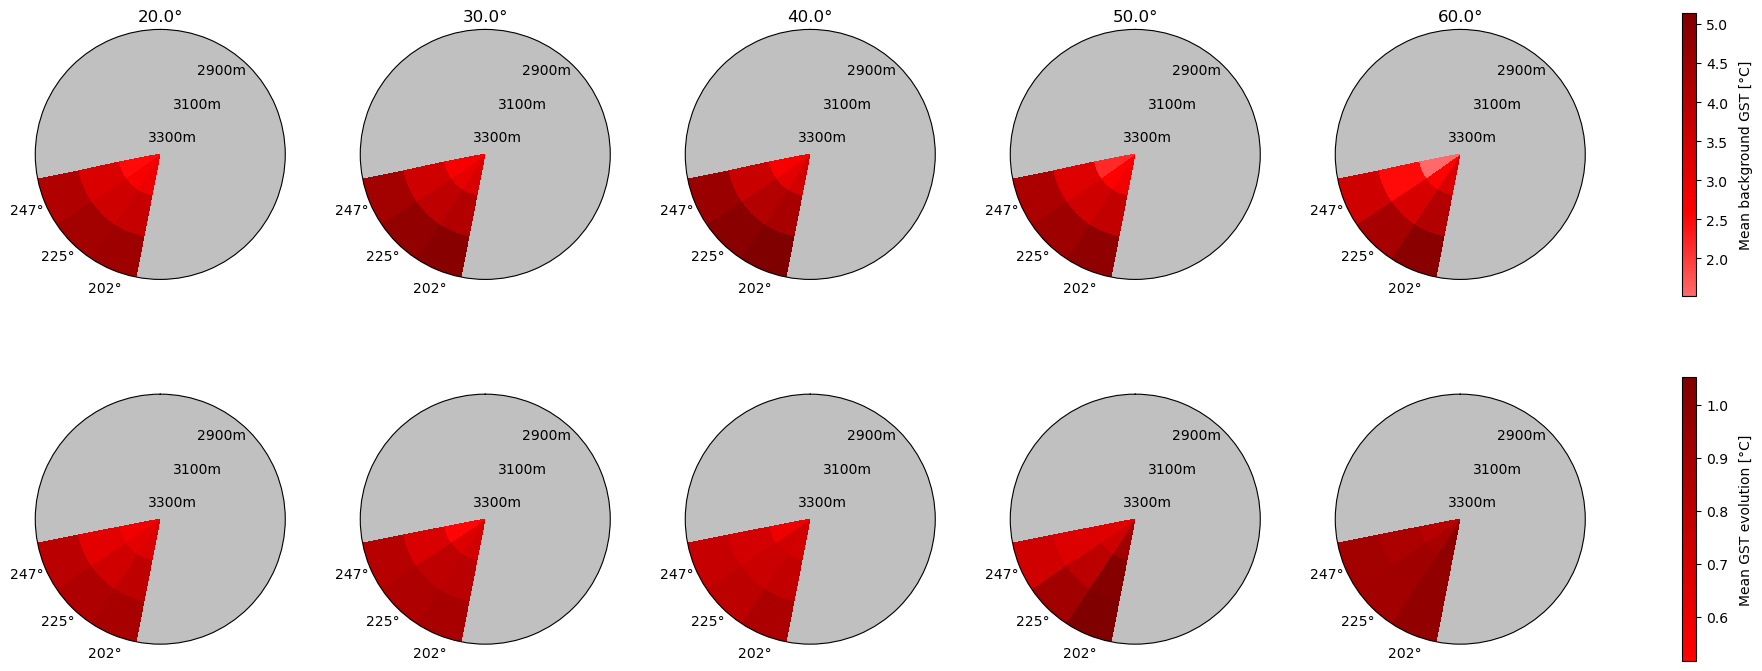


---------------------------------------------------------------------------------------------

Polar plot of the permafrost and glacier spatial distribution as a function of aspect and slope at all altitude


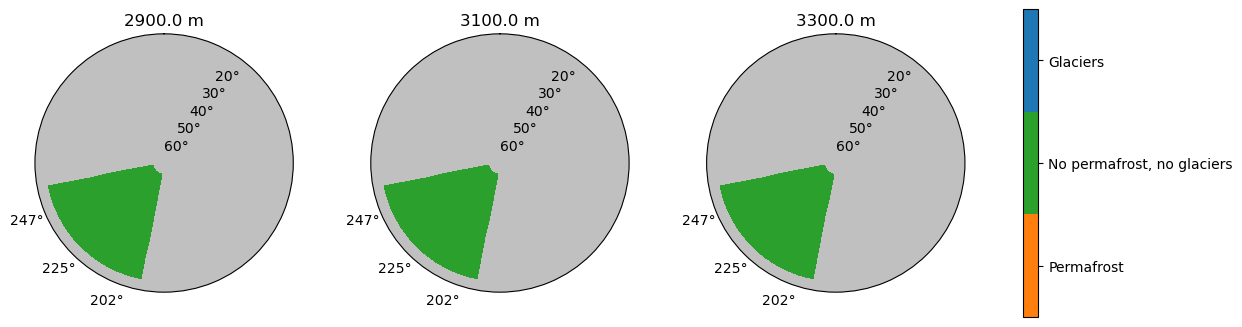

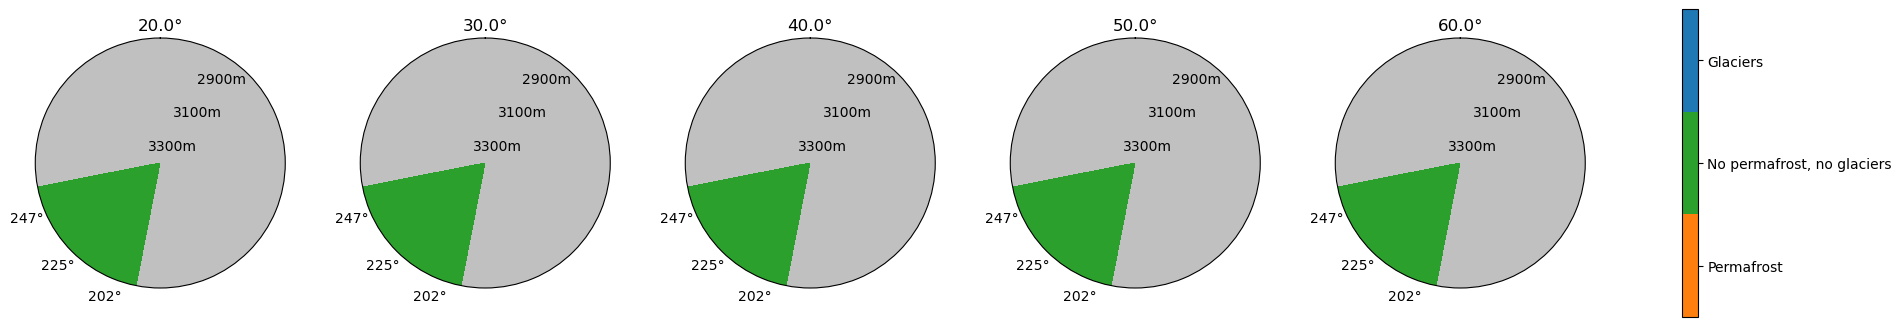


---------------------------------------------------------------------------------------------
-------------------------------------- FURTHER  PLOTS ---------------------------------------
---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------

CDF of background, transient, and evolution GST:


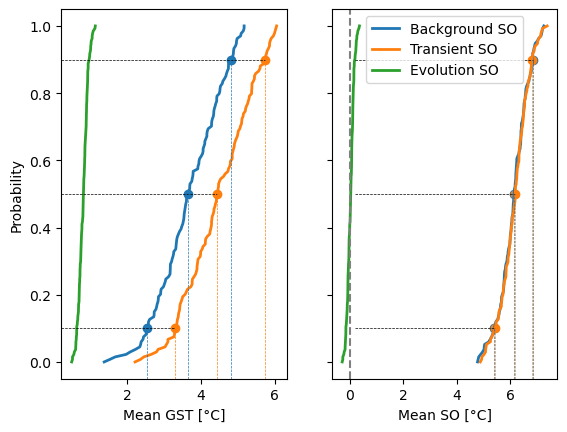


---------------------------------------------------------------------------------------------

Heatmap of 10th, 25th, 50th, 75th, and 90th percentile in background and transient GST, and the difference:


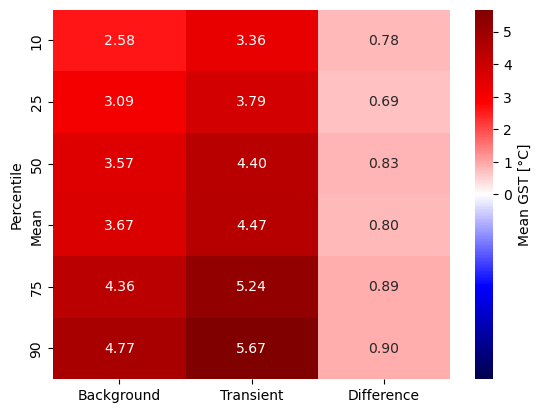


---------------------------------------------------------------------------------------------

Histogram of the evolution of the snow cover (in days) and melt-out date:


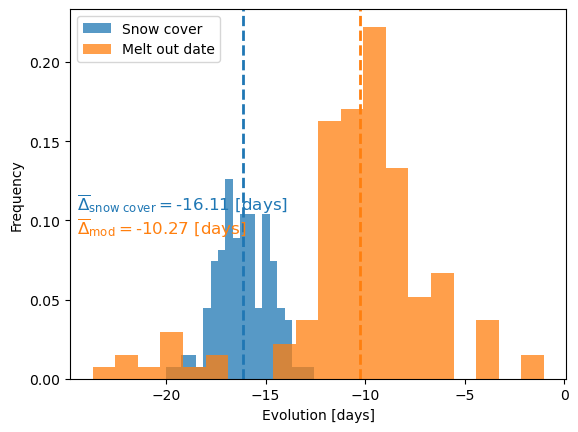


---------------------------------------------------------------------------------------------

Plot of mean GST evolution vs background GST, fit, and binning per 10% quantiles
R-square: 0.1464 , regression slope: 0.0578 , regression intercept: 0.5841


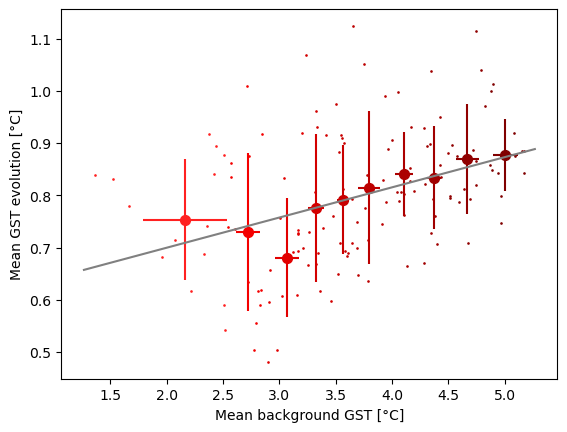


---------------------------------------------------------------------------------------------

Scatter plot of mean background GST vs evolution of mean GST between the background and transient period
altitude: 2900.0 , R-square: 0.0420 , regression slope: 0.0411 , regression intercept: 0.6818
altitude: 3100.0 , R-square: 0.0140 , regression slope: 0.0287 , regression intercept: 0.6917
altitude: 3300.0 , R-square: 0.0014 , regression slope: 0.0094 , regression intercept: 0.6971


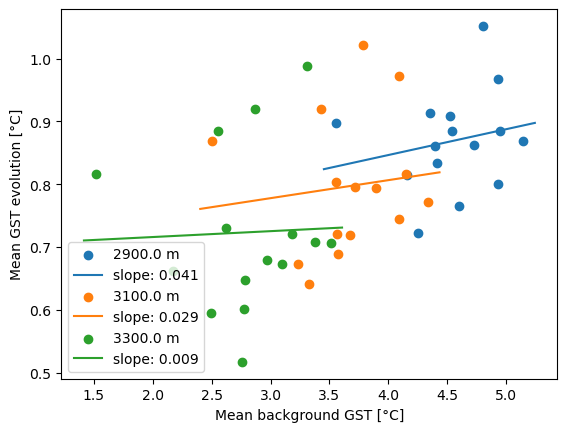


---------------------------------------------------------------------------------------------

Parity plot (statistically-modeled vs numerically-simulated) of background mean GST:


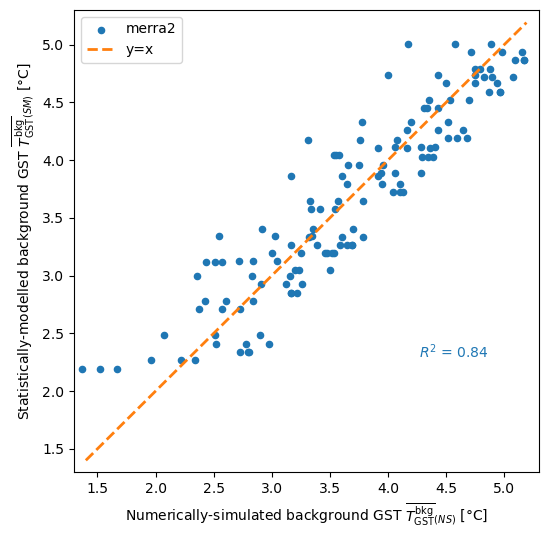

The model is given by the function: 
(offset + c_alt * altitude + c_asp * (altitude - d_alt) * np.cos(aspect * 2 * np.pi / 360) + c_slope * slope)
And the model coefficients are given by: 
  Coefficient       merra2
0      offset    18.349390
1       c_alt    -0.004948
2       d_alt  1426.046055
3       c_asp    -0.000845
4     c_slope    -0.007210

---------------------------------------------------------------------------------------------
---------------------------------- SUCCESSFULLY COMPLETED -----------------------------------
---------------------------------------------------------------------------------------------

Created a new pickle: dict_final_Aksaut_South_split_True.pkl


In [3]:
###############
# Ready to go #
###############

# When used for the first time, it createss the pickles
# When the pickles already exist, it simply loads them
# but it's easier to use the function 'load_all_pickles' for that
pkl = get_all_stats(
    forcing_list, path_forcing_list, path_metadata, path_ground, path_snow, path_pickle,
    year_bkg_end, year_trans_end, consecutive,
    site, date_event, topo_event,
    glacier, min_glacier_depth)

df = pkl['df']
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# this is a function that allows the used to load the pickles in a much simpler way
pkl = load_all_pickles(site, path_pickle)

df = pkl['df']
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# Finally, we can produce all the summary plots
final_dict = plot_all(site, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth, path_pickle,
         year_bkg_end, year_trans_end, path_horizon=path_horizon, no_weight=no_weight,
         print_plots=print_plots, split_legend=split_legend, save_plots_pdf=save_plots_pdf,
         custom_years=custom_years, query=query,
         show_hor=show_hor, show_hist=show_hist, show_glaciers=show_glaciers, show_yearly_box=show_yearly_box,
         show_yearly_stats_atmos=show_yearly_stats_atmos, show_yearly_stats_sims=show_yearly_stats_sims,
         show_thaw_depth=show_thaw_depth, show_2metrics_seasonal=show_2metrics_seasonal,
         show_1metric_seasonal=show_1metric_seasonal, show_decades=show_decades,
         show_excep_years=show_excep_years, show_normdev=show_normdev, show_landslide_time=show_landslide_time,
         show_individual_heatmap=show_individual_heatmap, show_heatmaps=show_heatmaps, show_quantiles=show_quantiles,
         show_meltout=show_meltout, show_GST_evol=show_GST_evol, show_parity=show_parity)